📂 Please upload train.csv (Kaggle House Prices dataset)


Saving train.csv to train.csv

📊 Test Metrics
MAE : 20,932.71
MSE : 1,006,765,317.52
RMSE: 31,729.57
R²  : 0.8323

     feature   coefficient
   GrLivArea    139.930833
BedroomAbvGr  20111.623385
    FullBath -29684.732776

Intercept: 53,503.71


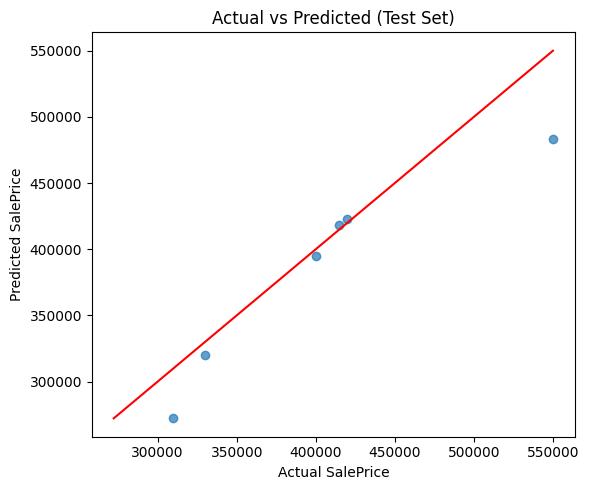

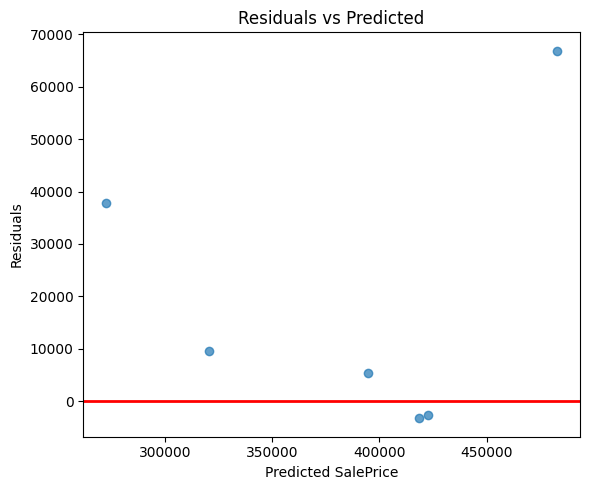

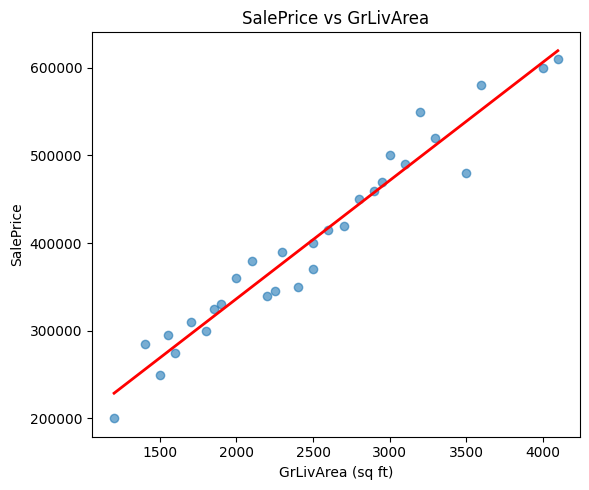


✅ Saved: house_price_linear_regression.pkl, model_features.pkl

🏡 Predicted Price for new house: $306,344.61


In [18]:
# ==== House Prices: Simple Linear Regression (Colab-Ready) ====
!pip install pandas scikit-learn joblib matplotlib --quiet

import os, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 1) Load train.csv (upload if not present)
csv_path = "train.csv"
if not os.path.exists(csv_path):
    from google.colab import files
    print("📂 Please upload train.csv (Kaggle House Prices dataset)")
    uploaded = files.upload()
    csv_path = next((name for name in uploaded.keys() if name.lower().endswith(".csv")), None)
    if csv_path is None:
        raise FileNotFoundError("train.csv not found. Please upload when prompted.")

df = pd.read_csv(csv_path)

# 2) Keep only required columns
required = ["SalePrice", "GrLivArea", "BedroomAbvGr", "FullBath"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"This is not the Kaggle train.csv. Missing: {missing}")

df = df[required].dropna().reset_index(drop=True)

X = df[["GrLivArea", "BedroomAbvGr", "FullBath"]]
y = df["SalePrice"]

# 3) Train/Test Split & Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predictions & Metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Test Metrics")
print(f"MAE : {mae:,.2f}")
print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.4f}\n")

coef = pd.DataFrame({"feature": X.columns, "coefficient": model.coef_})
print(coef.to_string(index=False))
print(f"\nIntercept: {model.intercept_:,.2f}")

# 5) Visualization
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
min_v, max_v = float(min(y_test.min(), y_pred.min())), float(max(y_test.max(), y_pred.max()))
plt.plot([min_v, max_v], [min_v, max_v], color='red')
plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Predicted SalePrice"); plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(X["GrLivArea"], y, alpha=0.6)
m, b = np.polyfit(X["GrLivArea"], y, 1)
xline = np.linspace(X["GrLivArea"].min(), X["GrLivArea"].max(), 200)
plt.plot(xline, m*xline + b, color='red', linewidth=2)
plt.xlabel("GrLivArea (sq ft)"); plt.ylabel("SalePrice")
plt.title("SalePrice vs GrLivArea")
plt.tight_layout()
plt.show()

# 6) Save Model & Features
joblib.dump(model, "house_price_linear_regression.pkl")
joblib.dump(list(X.columns), "model_features.pkl")
print("\n✅ Saved: house_price_linear_regression.pkl, model_features.pkl")

# 7) Predict Price for a New House
new_house = pd.DataFrame([{"GrLivArea": 1800, "BedroomAbvGr": 3, "FullBath": 2}])
predicted_price = model.predict(new_house[X.columns])
print(f"\n🏡 Predicted Price for new house: ${predicted_price[0]:,.2f}")
